## MG figures

In [3]:
import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from wfOpto import *

plt.style.use(r'C:\Users\nadia\OneDrive\Documents\GitHub\steinmetzlab\calcium imaging\ALpres.mplstyle')

pytoolsAL: Modules missing.  Not loading neuropixels.  Message: No module named 'slidingRP'
pytoolsAL: Modules missing.  Not loading plotting.  Message: No module named 'pandas'


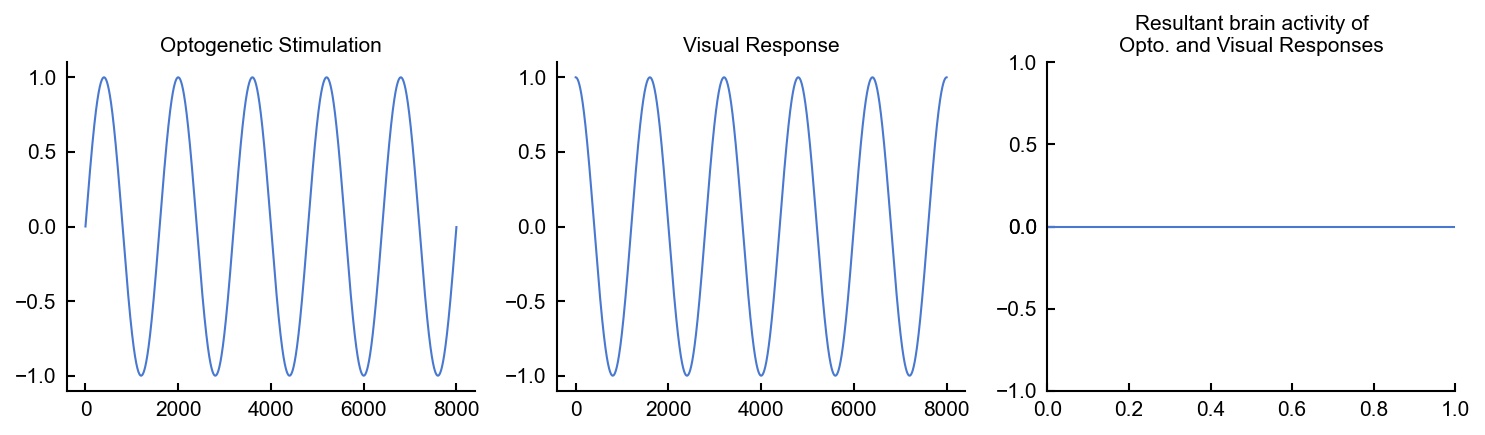

In [28]:
fig, axs = plt.subplots(1,3,figsize=(10,3))

Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y_sin = np.sin(2 * np.pi * f * x / Fs)
y_cos = np.cos(2*np.pi*f*x/Fs)

axs[0].plot(x, y_sin)
axs[0].set_title("Optogenetic Stimulation")
axs[1].plot(x,y_cos)
axs[1].set_title("Visual Response")
axs[2].axhline(y=0)
axs[2].set_ylim([-1,1])
axs[2].set_title("Resultant brain activity of\nOpto. and Visual Responses")
axs[2].set_yticks([-1, 0, -.5, 0, .5, 1])

fig.tight_layout()


- sans opsin 830 3.0 - 0,0
- optogenetic response find a 3.3 and 0,0? data717 exp 0 

Text(0, 0.5, '$\\Delta F$')

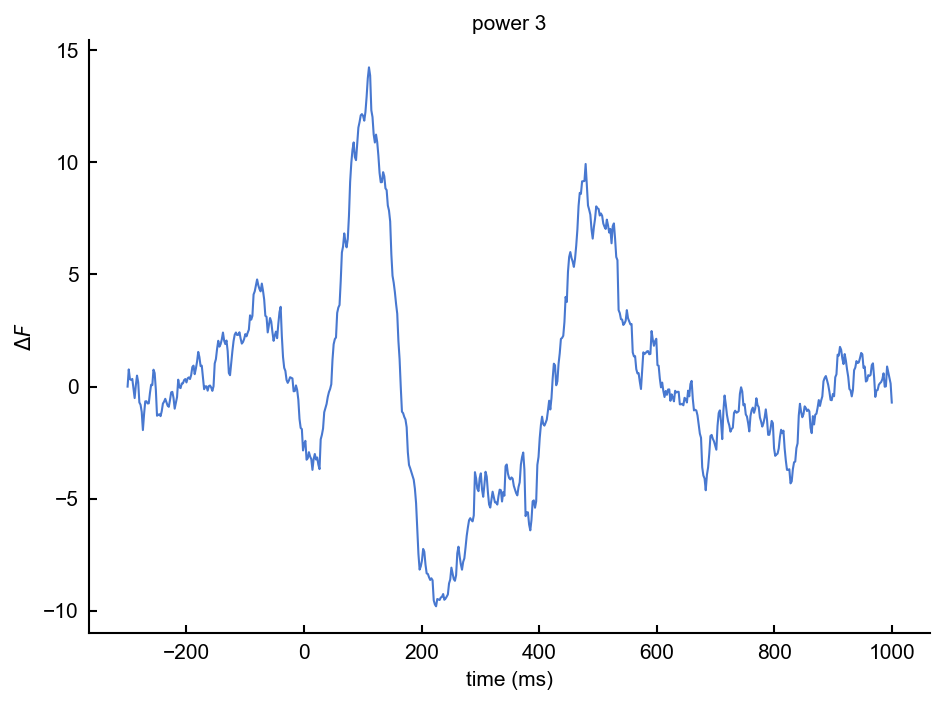

In [4]:
data830 = wfOpto((Path(r'Z:\Subjects\AL_0023\2023-08-30\1')), listExps=[np.r_[:1350], np.r_[1350:1800]])

Text(0, 0.5, '$\\Delta F$')

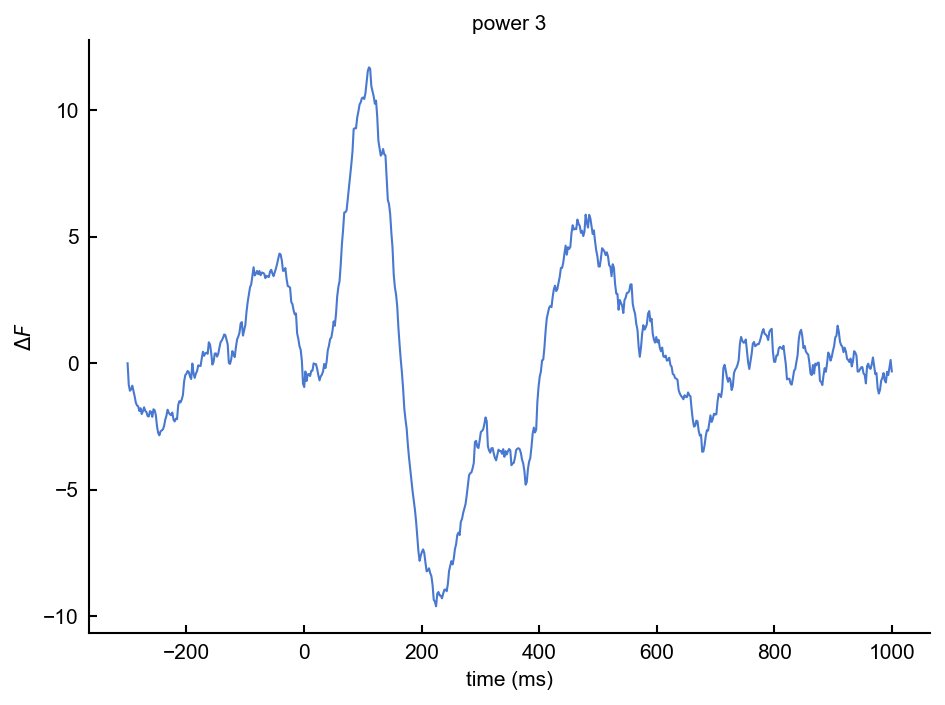

In [70]:
power = 3
pixel = (410, 428)
n_samples = 650
timestamps = np.linspace(-0.3, 1, n_samples)*1000

pixel_ix = np.ravel_multi_index((428, 410), (data830.py, data830.px))
pows = np.argwhere(data830.laserPowers[data830.listExps[0]] == power).ravel()
onTimes = data830.laserOn[data830.listExps[0]][pows]
trs = [np.linspace(-.3+on, 1+on, n_samples) for on in onTimes]
trs = np.squeeze(np.array(trs))

flicker = []
for iT, tr in enumerate(trs):
    wf = data830.tToWFManual(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = data830.svdSpat[pixel_ix] @ dwf
    flicker.append(mov)
flicker = np.array(flicker)
plt.plot(timestamps, np.mean(flicker, axis=0))
plt.title(f'power {power}')
plt.xlabel('time (ms)')
plt.ylabel('$\Delta F$')

In [39]:
data717 = wfOpto(Path(r'Z:\Subjects\ZYE_0069\2023-07-17\1'), [np.r_[:334], np.r_[334:667]])

Text(0, 0.5, '$\\Delta F$')

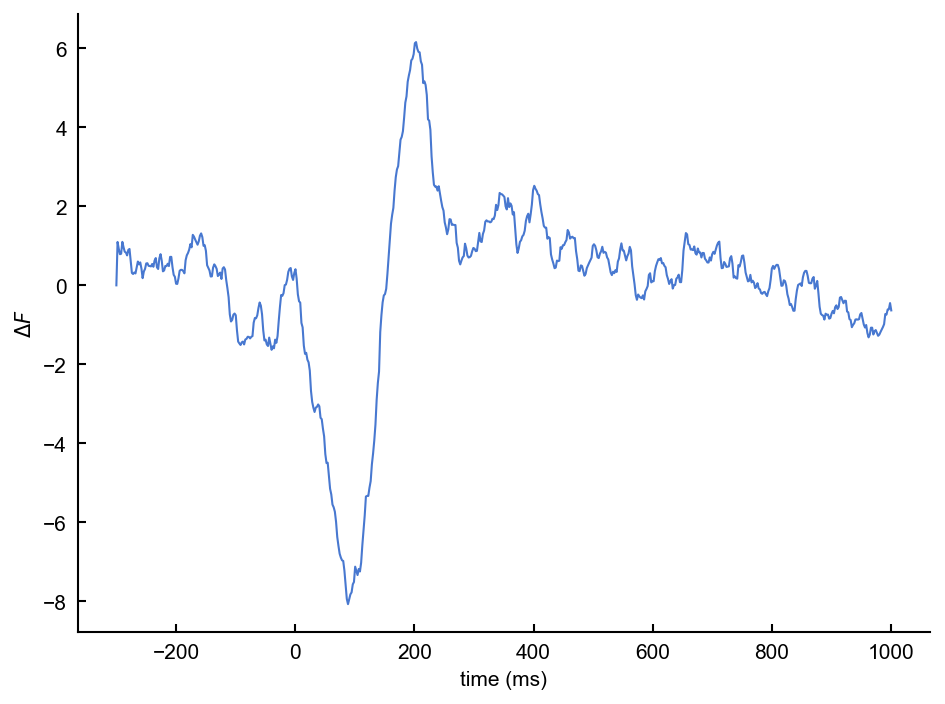

In [64]:
## spatial = data717.svdSpatFull.reshape(560*560, -1)
pixel_ix = np.ravel_multi_index((246,198), (data717.py, data717.py)) # the pixel
trials = np.squeeze(np.argwhere(data717.laserPowers[data717.listExps[0]]==3.2)) # the trials
time = [np.linspace(-.3+i, i+1, n_samples) for i in data717.laserOn[data717.listExps[0][trials]]] 
trs = np.squeeze(np.array(time))

opto = []
for iT, tr in enumerate(time):
    wf = data717.tToWFManual(tr)
    dwf = [np.diff(i, prepend=i[0]) for i in wf.T]
    dwf = np.array(dwf)
    mov = data717.svdSpat[pixel_ix] @ dwf
    opto.append(mov)
opto = np.array(opto)
plt.plot(timestamps, np.mean(opto, axis=0))
plt.xlabel('time (ms)')
plt.ylabel('$\Delta F$')

In [72]:
flicker = np.mean(flicker, axis=0)
opto = np.mean(opto, axis=0)

In [80]:
flicker_scale = flicker-4
sum=(flicker_scale+opto)

In [118]:
scale = np.mean(opto)/np.mean(flicker)

Text(0, 0.5, '$\\Delta F$')

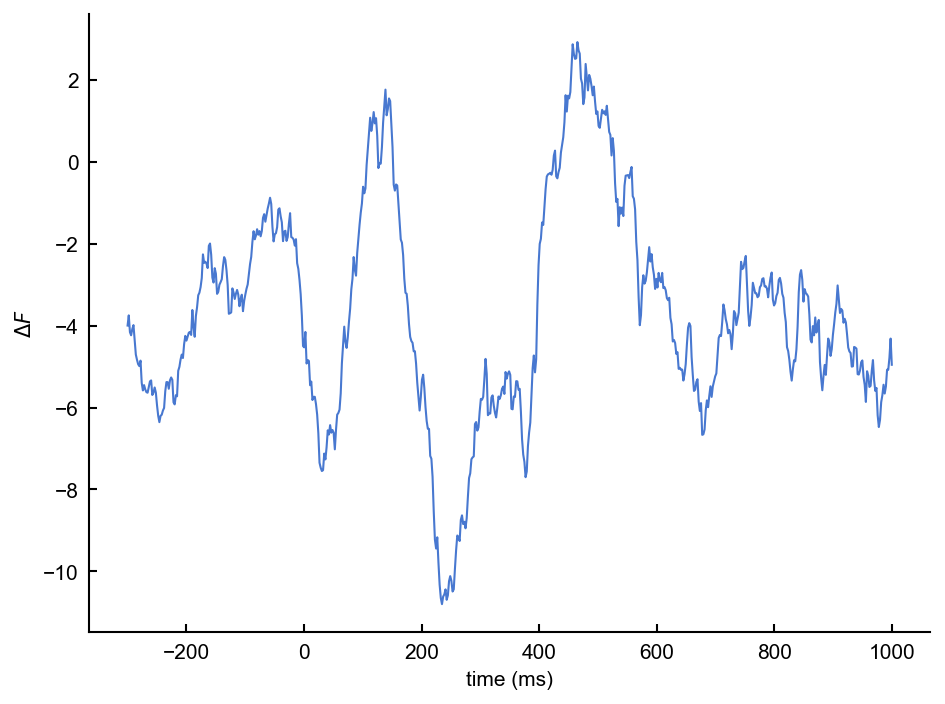

In [81]:
plt.plot(timestamps,sum)
plt.xlabel('time (ms)')
plt.ylabel('$\Delta F$')

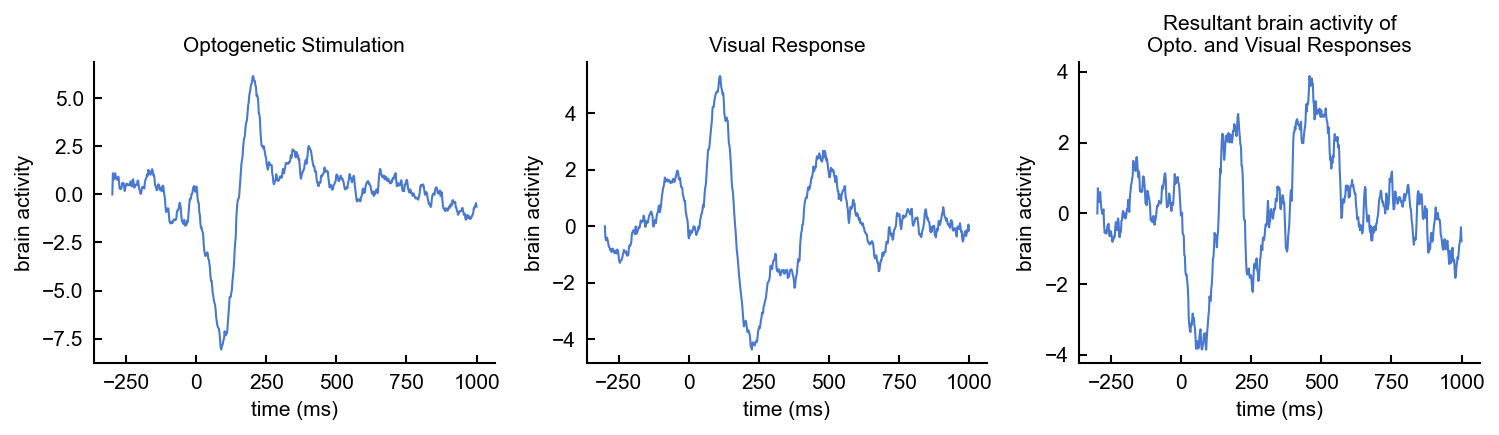

In [99]:
ig, axs = plt.subplots(1,3,figsize=(10,3))
flicker_scale = flicker*.45454545
axs[0].plot(timestamps,opto)
axs[0].set_title("Optogenetic Stimulation")
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('brain activity')
axs[1].plot(timestamps,flicker_scale)
axs[1].set_title("Visual Response")
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('brain activity')
axs[2].plot(timestamps,flicker_scale+opto)
axs[2].set_title("Resultant brain activity of\nOpto. and Visual Responses")
axs[2].set_xlabel('time (ms)')
axs[2].set_ylabel('brain activity')

plt.show()

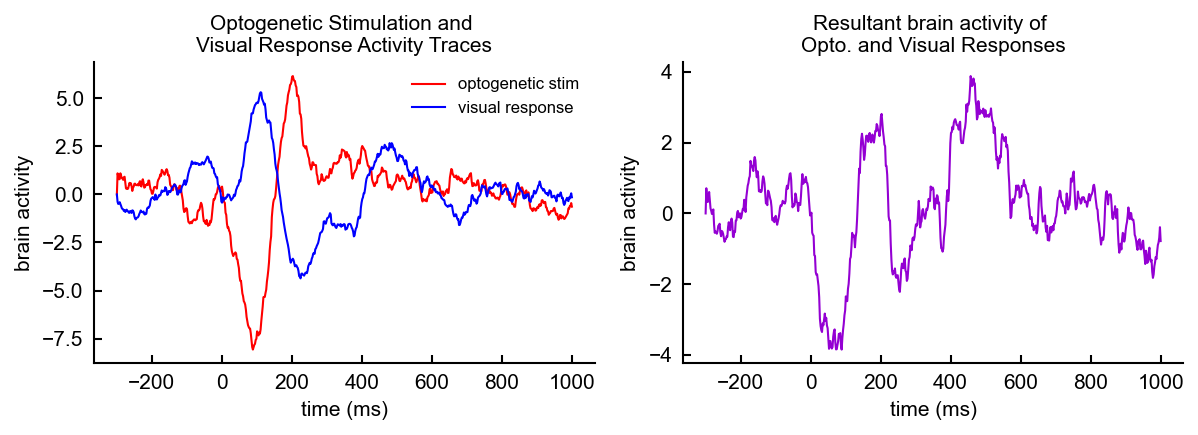

In [122]:
fig, axs = plt.subplots(1,2,figsize=(8,3))
flicker_scale = flicker*.45454545

axs[0].plot(timestamps,opto,color='red')
axs[0].set_title("Optogenetic Stimulation and \nVisual Response Activity Traces")
axs[0].set_xlabel('time (ms)')
axs[0].set_ylabel('brain activity')
axs[0].plot(timestamps,flicker_scale,color='blue')
axs[0].legend(['optogenetic stim','visual response'])

axs[1].plot(timestamps,flicker_scale+opto,color='darkviolet')
axs[1].set_title("Resultant brain activity of \nOpto. and Visual Responses")
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('brain activity')

plt.show()

In [116]:
scale = np.mean(opto)/np.mean(flicker)

In [117]:
scale

0.2573191293708672